Name: Smayan Kulkarni\
SapID: 60009230142\
RollNo: D100

Colab Link : https://colab.research.google.com/github/SmayanKulkarni/AI-and-ML-Course/blob/master/SDS/D120_SDS_Lab9.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Step 1: Create dataset
X = np.array([[4,2], [2,4], [2,3], [3, 6], [4,4], [9,10], [6,8], [9,5], [8,7], [10,8]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Class A: 0, Class B: 1

In [ ]:
# Step 2: Compute mean vectors
mean_vectors = [np.mean(X[y == cl], axis=0) for cl in [0, 1]]
mu_A, mu_B = mean_vectors

In [ ]:
# Step 3: Between-class scatter matrix
mean_diff = (mu_A - mu_B).reshape(2, 1)
S_B = np.dot(mean_diff, mean_diff.T)
print(S_B)

[[29.16 20.52]
 [20.52 14.44]]


In [ ]:
# Step 4: Within-class scatter matrix
S_W = np.zeros((2, 2))
for cl, mu in zip([0, 1], mean_vectors):
    class_sc_mat = np.zeros((2, 2))  # scatter matrix for each class
    for row in X[y == cl]:
        row, mu = row.reshape(2, 1), mu.reshape(2, 1)
        class_sc_mat += (row - mu).dot((row - mu).T)
    S_W += class_sc_mat  # sum class scatter matrices
print(S_W)

[[13.2 -1.2]
 [-1.2 22. ]]


In [ ]:
# Step 5: Fisher's Discriminant Vector
S_W_inv = np.linalg.inv(S_W)
w_fisher = np.dot(S_W_inv, (mu_A - mu_B).reshape(2, 1))
print(w_fisher)

[[-0.4269103 ]
 [-0.19601329]]


In [ ]:
# Step 6: Eigenvalues and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(np.dot(S_W_inv, S_B))

print(eig_vals)
print(eig_vecs)

[3.05016611 0.        ]
[[ 0.90878558 -0.57549341]
 [ 0.41726342  0.81780642]]


In [ ]:
# Step 7: Select eigenvector with largest eigenvalue
idx = np.argmax(eig_vals.real)
w = eig_vecs[:, idx].real.reshape(2, 1)
print(w)

[[0.90878558]
 [0.41726342]]


In [ ]:
# Step 8: Project data
X_lda = X.dot(w)
print(X_lda)

[[ 4.46966918]
 [ 3.48662485]
 [ 3.06936143]
 [ 5.22993727]
 [ 5.30419602]
 [12.35170446]
 [ 8.79082087]
 [10.26538736]
 [10.19112861]
 [12.4259632 ]]


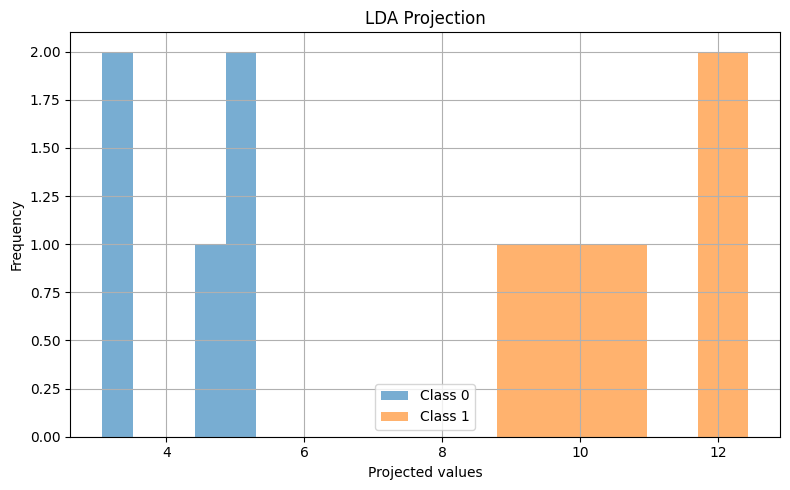

In [ ]:
# Step 9: Plot projection
plt.figure(figsize=(8, 5))
for label in np.unique(y):
    plt.hist(X_lda[y == label], label=f'Class {label}', alpha=0.6, bins=5)
plt.title('LDA Projection')
plt.xlabel('Projected values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()